# Downloading Dataset From Kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rahul713","key":"ee3ba3d72e0aaca9b6393d3a6b2a2c5c"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d adammaus/predicting-churn-for-bank-customers

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 108MB/s]


In [4]:
!unzip predicting-churn-for-bank-customers.zip

Archive:  predicting-churn-for-bank-customers.zip
  inflating: Churn_Modelling.csv     


# Importing libraries and reading csv file

In [5]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('./Churn_Modelling.csv')

In [7]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Exploring data

In [8]:
# checking the columns
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# finding shape
data.shape

(10000, 14)

In [10]:
# looking for information like shape , data type and other infos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
# droping irrelevent columns to reduce dimensionality and noise in dataset
data.drop(columns=['RowNumber' , 'CustomerId' , 'Surname'] , inplace = True)

In [12]:
# confirming the drop has worked or not
data.shape

(10000, 11)

In [13]:
# Renaming the "Exited" variable to "Target" for convenience
data.rename(columns={'Exited' : 'Target'}, inplace = True)

In [14]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Target'],
      dtype='object')

In [15]:
# finding unique value in each feature
data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Target                2
dtype: int64

## Dealing with missing values

In [16]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Target             0
dtype: int64

There is no missing value found.

## Dealing with categorical variables

**QUES : Why we need to convert categorical variable to numerical variable ?**
****
Ans : Converting categorical variables to numerical variables is necessary for machine learning algorithms because most algorithms operate on numerical data. Categorical data, such as text labels or categories, cannot be directly processed by algorithms. Converting them to numerical form, typically using techniques like one-hot encoding or label encoding, allows algorithms to understand and analyze these variables, making it possible to incorporate categorical information into model training and predictions.

In [17]:
# assigning the "object" data type columns name to obj
obj = data.select_dtypes(include="object").columns
obj

Index(['Geography', 'Gender'], dtype='object')

In [18]:
data[obj].nunique()

Geography    3
Gender       2
dtype: int64

In [19]:
data.Gender

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object

In [20]:
# using one-hot encoding to convert gender = {male : female} to gender_male = {1 : 0}
# we use one-hot encoding to convert categorical variable to numerical variable
data = pd.get_dummies(data=data , columns=['Gender'] , drop_first=True)

In [21]:
data.Gender_Male

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender_Male, Length: 10000, dtype: uint8

In [22]:
# for "Geography" feature , we are going to use label encoding
# because we don't want to increase the dimensions

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Geography_Encoded'] = label_encoder.fit_transform(data['Geography'])

In [23]:
data.shape

(10000, 12)

**Ques : Describe Label encoding with pros and cons ?**
****
Ans : Label Encoding is a technique used to convert categorical data into numerical form by assigning a unique integer to each category.

1. Pros:

  * Simplicity: It's straightforward and easy to implement.
Space Efficiency: It doesn't significantly increase the dataset's size.
  * Preserves Order: It preserves the ordinal relationship between categories, which is useful for some algorithms.
2. Cons:

  * Arbitrary Assignments: It may introduce unintended ordinality, implying relationships that don't exist.
  * Misleading Magnitudes: Algorithms might misinterpret encoded values as having meaningful magnitudes.
  * Incompatible with Some Algorithms: Some models may not handle label-encoded data well, as they might assume numerical values represent meaningful quantities.

****
**Ques : Difference between one-hot encoding and Label encoding**
****
Ans :
* One-Hot Encoding: It represents each category as a binary vector, where each category corresponds to a unique binary column. It's suitable for nominal data without any ordinal relationship. Pros include preserving category distinctions, but it can increase dimensionality, potentially leading to the curse of dimensionality.

* Label Encoding: It assigns a unique integer to each category, preserving ordinality if present. It's suitable for ordinal data but not ideal for nominal data, as it implies order and may confuse algorithms. Pros include simplicity and space efficiency.

## plotting graph

### Relation with CreditScore and Target variable

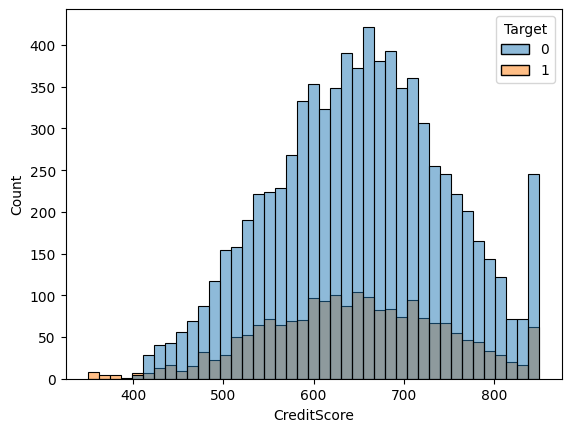

In [24]:
sns.histplot(data = data , x = data.CreditScore , hue = data.Target);

Everything seems fine, and the graph follows a Gaussian distribution. However, I can't draw any particular insights.

### with Geography

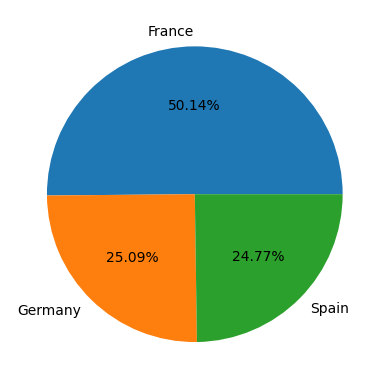

In [25]:
labels = data['Geography'].value_counts().index.tolist()
sizes = data['Geography'].value_counts().tolist()

plt.pie(x=sizes, labels=labels, autopct='%.2f%%')
plt.show()

<Axes: xlabel='Geography', ylabel='count'>

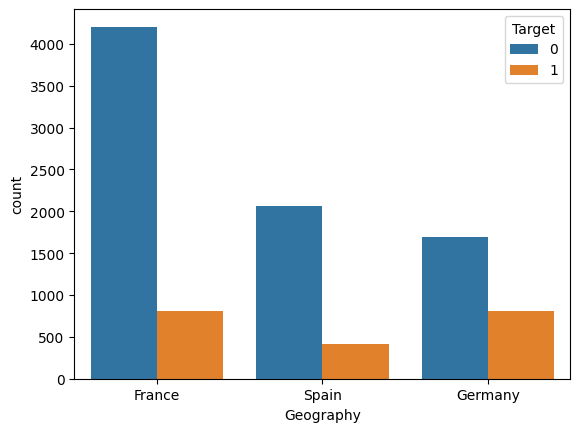

In [26]:
sns.countplot(data= data , x = data.Geography , hue = data.Target)

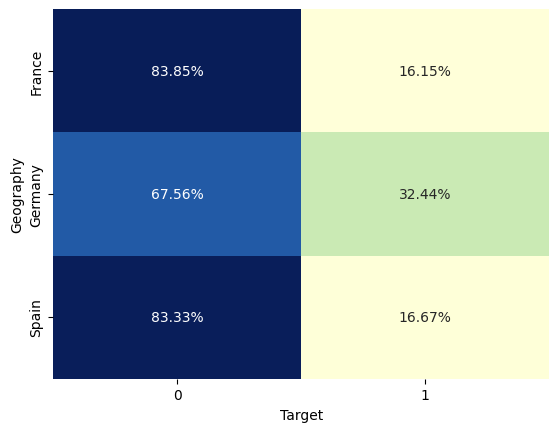

In [27]:
cross_tab = pd.crosstab(data.Geography , data.Target , normalize='index')
sns.heatmap(cross_tab , annot = True , fmt = '0.2%' , cbar = False , cmap = "YlGnBu");

The churn rate of people living in Germany is twice as high as the churn rate of those living in France and Spain.

### with Age

In [28]:
 data.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

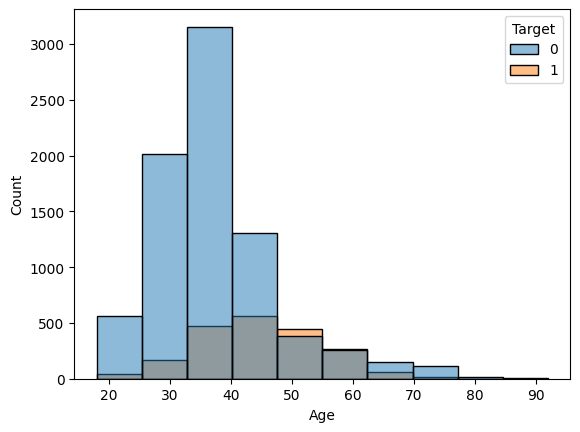

In [29]:
sns.histplot(data = data , x = data.Age , hue=data.Target , bins = 10);

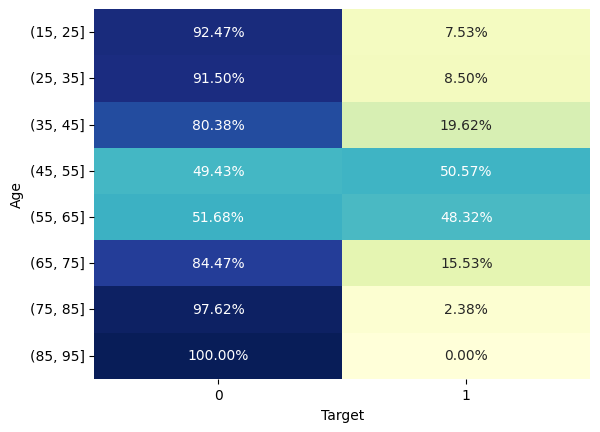

In [30]:
age_bins = pd.cut(data['Age'], bins=range(15, 100, 10))

cross_tab = pd.crosstab(age_bins, data['Target'] , normalize= 'index')

sns.heatmap(cross_tab , annot = True , fmt = '0.2%' , cbar = False , cmap = "YlGnBu");


The churn rate for the age group between 45 and 65 is approximately 50%, significantly higher than the churn rates in other age groups.

### with Gender

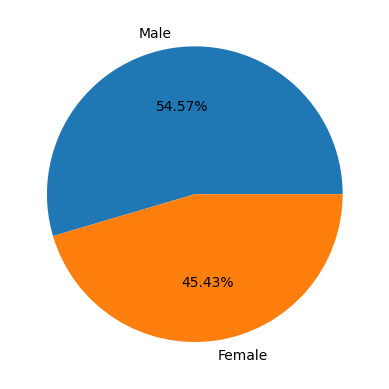

In [31]:
plt.pie(x= data.Gender_Male.value_counts() , labels=['Male' , 'Female'] , autopct='%0.2f%%');

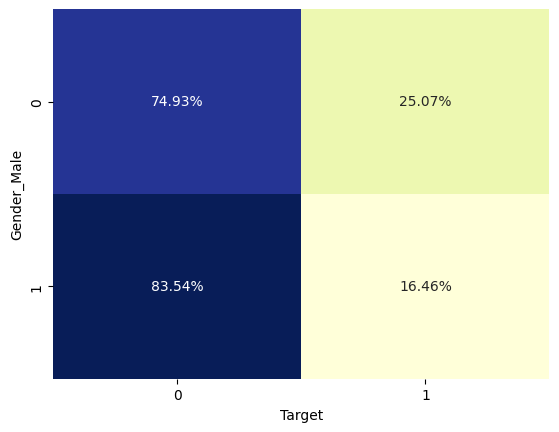

In [32]:
cross_tab = pd.crosstab(data.Gender_Male , data.Target , normalize='index')
sns.heatmap(cross_tab , annot = True , cmap = 'YlGnBu' , cbar = False , fmt = '.2%');


churn rate of female is greater than male

### with Tenure

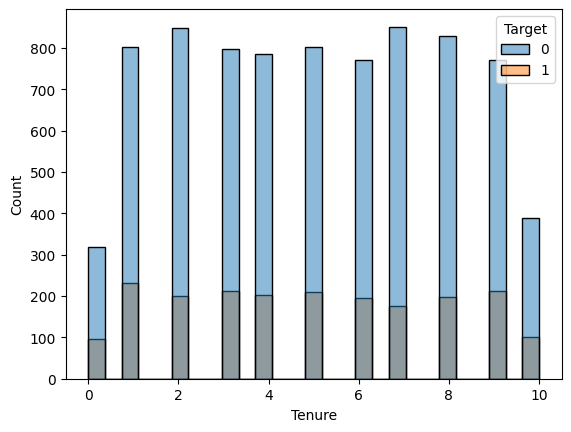

In [33]:
sns.histplot(data = data , x = data.Tenure , hue = data.Target);

### with Balance

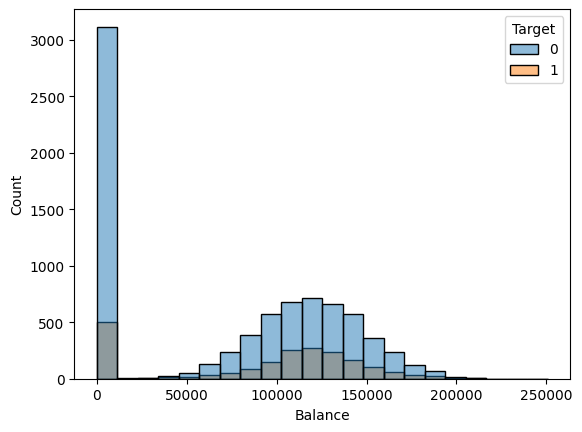

In [34]:
sns.histplot(data = data , x = data.Balance , hue = data.Target);

### with NumOfProducts

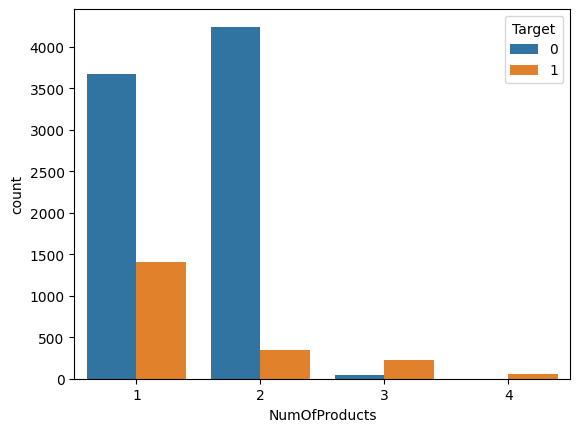

In [35]:
sns.countplot(data=data  , x = data.NumOfProducts , hue = data.Target);

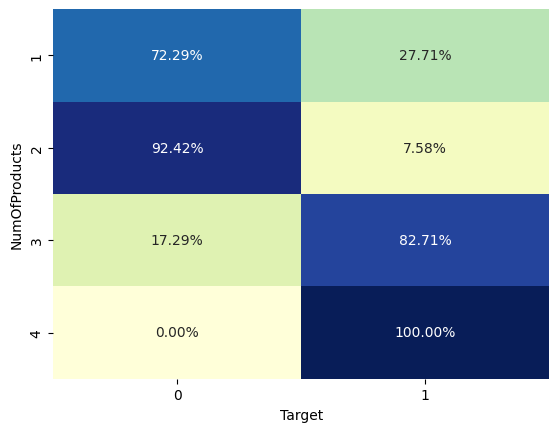

In [36]:
cross_tab = pd.crosstab(data.NumOfProducts , data.Target , normalize='index')
sns.heatmap(cross_tab , annot = True , cmap = 'YlGnBu' , cbar = False , fmt = '0.2%');

people with more than 2 products have high churn rate .

### with HasCrCard

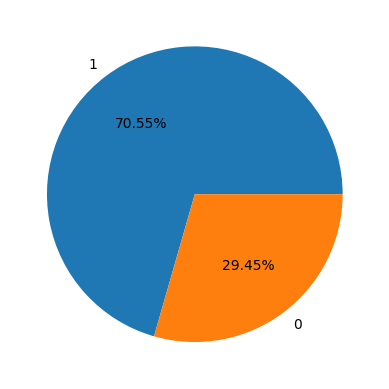

In [37]:
plt.pie(data.HasCrCard.value_counts() ,labels=data.HasCrCard.value_counts().index , autopct='%.2f%%');

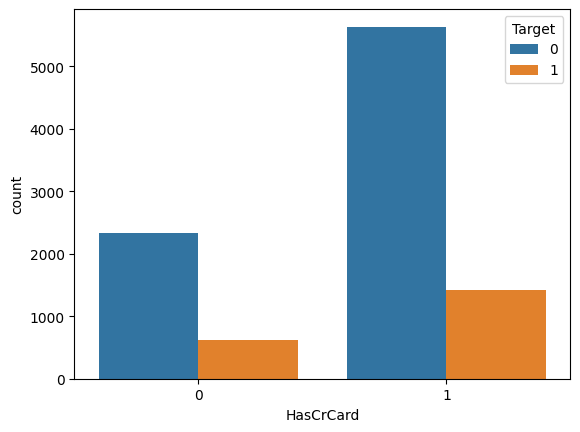

In [38]:
sns.countplot(data = data , x = data.HasCrCard , hue = data.Target);

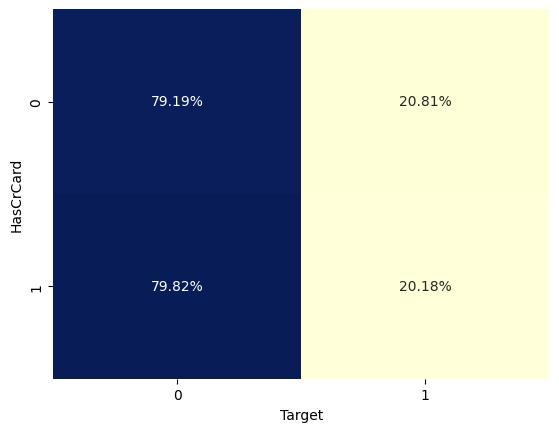

In [39]:
cross_tab = pd.crosstab(data.HasCrCard , data.Target , normalize='index')
sns.heatmap(cross_tab , annot = True , cbar = False ,cmap = 'YlGnBu' , fmt = '0.2%');

### with IsActiveMember

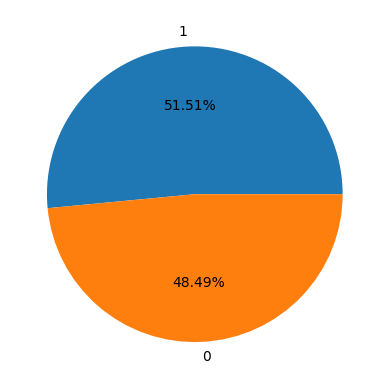

In [40]:
plt.pie(data.IsActiveMember.value_counts() , labels = data.IsActiveMember.value_counts().index , autopct= '%0.2f%%');

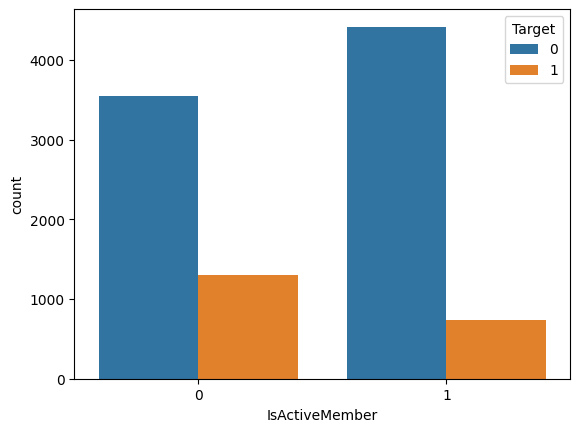

In [41]:
sns.countplot(data = data , x= data.IsActiveMember , hue= data.Target);

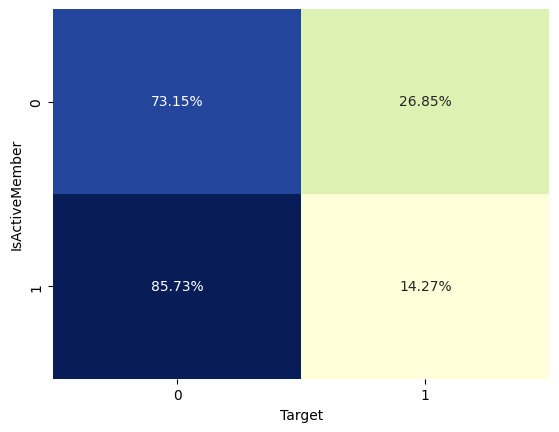

In [42]:
cross_tab = pd.crosstab(data.IsActiveMember , data.Target , normalize = 'index')
sns.heatmap(cross_tab , annot = True , cbar = False , cmap = 'YlGnBu' , fmt = '0.2%');

Active members have a lower likelihood of churning than Non-Avtive ones.

### with EstimatedSalary

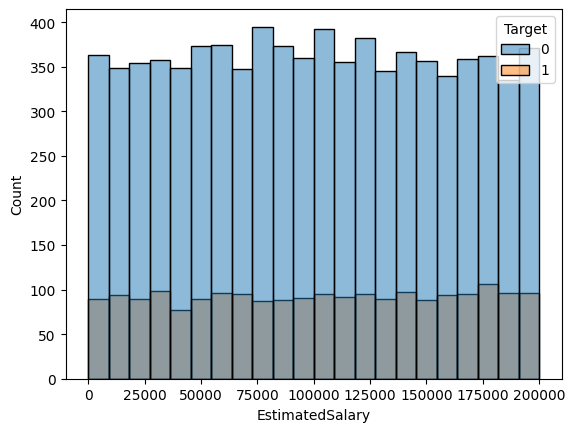

In [43]:
sns.histplot(data = data , x = data.EstimatedSalary , hue = data.Target);

### Correlation Matrix

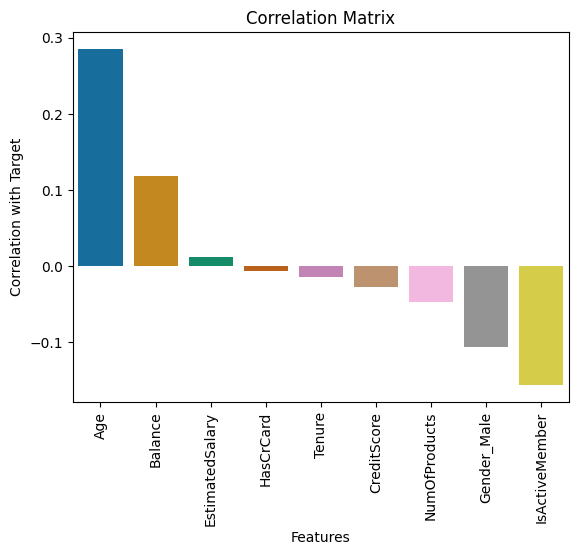

In [44]:
features = data.drop(columns=['Target' , 'Geography_Encoded'])
correlation = features.corrwith(data['Target']).sort_values(ascending=False)

sns.barplot(x = correlation.index , y = correlation.values , palette='colorblind')
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Correlation Matrix')
plt.show()

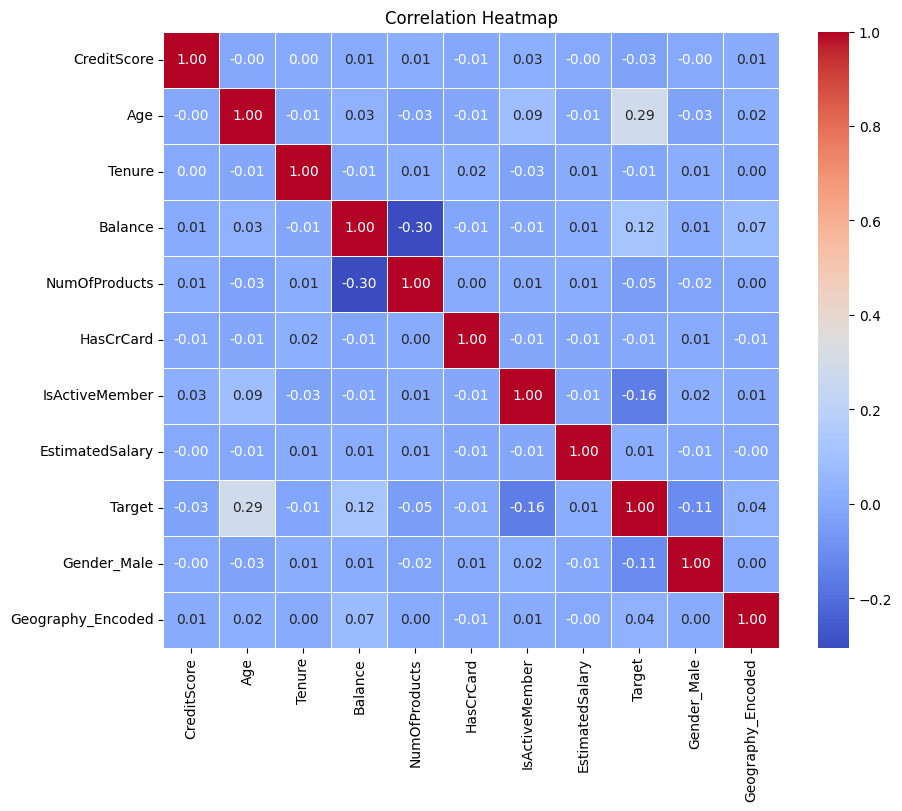

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor="white", square=True)

plt.title("Correlation Heatmap")
plt.show()

# Feature Scaling

In [46]:
data.drop(columns='Geography' , inplace = True)
features = data.drop(columns = 'Target').copy()
target = data.Target

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features=scaler.fit_transform(features)


## Splitting the data

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train , x_test , y_train , y_test = train_test_split(features , target , test_size=0.20 , random_state=0)

**Ques : when to use fit and fit_transform ?**
****
Ans : Use fit to learn transformation parameters from data.

Use fit_transform to learn and apply the transformation in one step.

Choose based on whether you need to reuse the transformation later (fit) or not (fit_transform)

**Ques : can we apply standard scaling to binary data ?**
****
Ans : Applying standard scaling (z-score normalization) directly to binary data is generally not appropriate or meaningful because binary data consists of discrete categories with only two possible values (usually 0 and 1). Standard scaling assumes a continuous distribution with a mean and standard deviation, which doesn't apply to binary data.

# Model

* Logistic Regression
* Random Forest
* XGBoost
* Gradient Boosting Classifier
* Light GBM
* CART
* CatBoost
* KNN
* Naive bayes (Gaussian)

In [50]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [55]:
lr  = LogisticRegression(random_state=0)
rf = RandomForestClassifier(random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0)
cart = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()
gnb = GaussianNB()

catboost_params = {'verbose': 0,}
catboost = CatBoostClassifier(**catboost_params , random_state=0)

lgb_params = {'verbosity': -1,}
lightgbm = LGBMClassifier(**lgb_params , random_state=0)

In [68]:
from sklearn.metrics import accuracy_score , precision_score , f1_score , recall_score , confusion_matrix , roc_curve , auc
from sklearn.model_selection import cross_val_score , learning_curve

In [57]:
def get_result(model_name , y_test , y_pred):
  accuracy = accuracy_score(y_test , y_pred)
  precision = precision_score(y_test , y_pred)
  recall = recall_score(y_test , y_pred)
  f1 = f1_score(y_test , y_pred)
  result = pd.DataFrame([[model_name , round(accuracy,2) , round(precision , 2) , round(recall ,2) , round(f1,2)]],
                        columns=['Model','accuracy' , 'precision' , 'recall' , 'f1'])
  return result



def cross_result(model , model_name , X_train , y_train):
  accuracies = cross_val_score(model, X_train , y_train , cv=5)

  cross_res = pd.DataFrame([[model_name , round(accuracies.mean()*100 , 2) , round(accuracies.std()*100 , 2)]] ,
                            columns=['Model' , 'Accuracy (mean) in percentage' , 'Standard Deviation in percentage'])
  return cross_res


In [58]:
def get_learning_curves(model , model_name , X_train , y_train):
  global total_learning_curves
  train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, cv=5)
  total_learning_curves[model_name] = {
        'train_sizes': train_sizes,
        'train_scores': train_scores,
        'valid_scores': valid_scores
  }


def get_roc_curve(model , model_name , X_test):
  global total_roc_curves
  y_pred_proba = model.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  total_roc_curves[model_name] = {
        'fpr': fpr,
        'tpr': tpr,
        'thresholds': thresholds
  }

def get_confusion_matrix(model_name , y_test , y_pred):
  global total_cm
  total_cm[model_name] = confusion_matrix(y_test , y_pred)

## Training Models

In [59]:
Models = [lr , rf , gbc, xgboost , cart , knn , gnb , catboost , lightgbm]
Result = pd.DataFrame()
Result_cross_validation = pd.DataFrame()
total_cm = {}
total_learning_curves = {}
total_roc_curves = {}

In [60]:
for model in Models:

  model_name = model.__class__.__name__
  model.fit(x_train , y_train)
  y_pred = model.predict(x_test)

  temp = get_result(model_name = model_name , y_test = y_test , y_pred = y_pred)
  Result = pd.concat([temp,Result] , ignore_index = True)

  get_confusion_matrix(model_name=model_name , y_test = y_test , y_pred = y_pred)

  get_learning_curves(model=model , model_name= model_name , X_train = x_train , y_train = y_train )

  get_roc_curve(model=model , model_name= model_name , X_test = x_test)

  temp2 = cross_result(model = model , model_name= model_name , X_train = x_train , y_train = y_train)
  Result_cross_validation = pd.concat([temp2 , Result_cross_validation] , ignore_index=True)

In [61]:
Result.style.highlight_max(subset= Result.columns[1:], color = '#99FF99').highlight_min(subset= Result.columns[1:],color = '#FF9999')

,Model,accuracy,precision,recall,f1
0,LGBMClassifier,0.860000,0.710000,0.520000,0.600000
1,CatBoostClassifier,0.860000,0.730000,0.520000,0.600000
2,GaussianNB,0.830000,0.690000,0.260000,0.380000
3,KNeighborsClassifier,0.830000,0.640000,0.430000,0.510000
4,DecisionTreeClassifier,0.790000,0.490000,0.560000,0.520000
5,XGBClassifier,0.850000,0.670000,0.510000,0.580000
6,GradientBoostingClassifier,0.860000,0.750000,0.500000,0.600000
7,RandomForestClassifier,0.870000,0.750000,0.500000,0.600000
8,LogisticRegression,0.810000,0.580000,0.180000,0.270000


In [62]:
Result_cross_validation.style.highlight_max(subset= Result_cross_validation.columns[1:], color = '#99FF99').highlight_min(subset= Result_cross_validation.columns[1:],color = '#FF9999')

,Model,Accuracy (mean) in percentage,Standard Deviation in percentage
0,LGBMClassifier,85.800000,0.470000
1,CatBoostClassifier,86.240000,0.650000
2,GaussianNB,82.600000,0.720000
3,KNeighborsClassifier,82.980000,0.270000
4,DecisionTreeClassifier,78.660000,1.300000
5,XGBClassifier,84.910000,0.670000
6,GradientBoostingClassifier,86.080000,0.750000
7,RandomForestClassifier,86.010000,0.640000
8,LogisticRegression,80.810000,0.480000


## Hyperparameter Optimization on CatBoost classifier using Random search

In [70]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, random_state=0)

random_search.fit(x_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)

best_model = random_search.best_estimator_

Best Hyperparameters: {'n_estimators': 130, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 80, 'bootstrap': True}


In [78]:
Models.append(best_model)
best_model.fit(x_train , y_train)
y_pred = best_model.predict(x_test)

In [72]:
temp = get_result(model_name='Best Model' , y_test=y_test , y_pred = y_pred)
Result = pd.concat([temp , Result] , ignore_index=True)

get_learning_curves(model = best_model , model_name = 'Best Model' ,X_train=x_train , y_train= y_train)
get_roc_curve(model=best_model , model_name = 'Best Model' , X_test=x_test)
get_confusion_matrix(model_name='Best Model' , y_test = y_test , y_pred = y_pred)

temp2 = cross_result(model=best_model , X_train = x_train , y_train = y_train , model_name = 'Best Model')
Result_cross_validation = pd.concat([temp2 , Result_cross_validation] , ignore_index = True)


## Evaluating

In [73]:
Result.style.highlight_max(subset= Result.columns[1:], color = '#99FF99').highlight_min(subset= Result.columns[1:],color = '#FF9999')

,Model,accuracy,precision,recall,f1
0,Best Model,0.870000,0.760000,0.500000,0.600000
1,LGBMClassifier,0.860000,0.710000,0.520000,0.600000
2,CatBoostClassifier,0.860000,0.730000,0.520000,0.600000
3,GaussianNB,0.830000,0.690000,0.260000,0.380000
4,KNeighborsClassifier,0.830000,0.640000,0.430000,0.510000
5,DecisionTreeClassifier,0.790000,0.490000,0.560000,0.520000
6,XGBClassifier,0.850000,0.670000,0.510000,0.580000
7,GradientBoostingClassifier,0.860000,0.750000,0.500000,0.600000
8,RandomForestClassifier,0.870000,0.750000,0.500000,0.600000
9,LogisticRegression,0.810000,0.580000,0.180000,0.270000


In [74]:
Result_cross_validation.style.highlight_max(subset= Result_cross_validation.columns[1:], color = '#99FF99').highlight_min(subset= Result_cross_validation.columns[1:],color = '#FF9999')

,Model,Accuracy (mean) in percentage,Standard Deviation in percentage
0,Best Model,86.290000,0.580000
1,LGBMClassifier,85.800000,0.470000
2,CatBoostClassifier,86.240000,0.650000
3,GaussianNB,82.600000,0.720000
4,KNeighborsClassifier,82.980000,0.270000
5,DecisionTreeClassifier,78.660000,1.300000
6,XGBClassifier,84.910000,0.670000
7,GradientBoostingClassifier,86.080000,0.750000
8,RandomForestClassifier,86.010000,0.640000
9,LogisticRegression,80.810000,0.480000


## learning curve , roc curve and confusion matrix

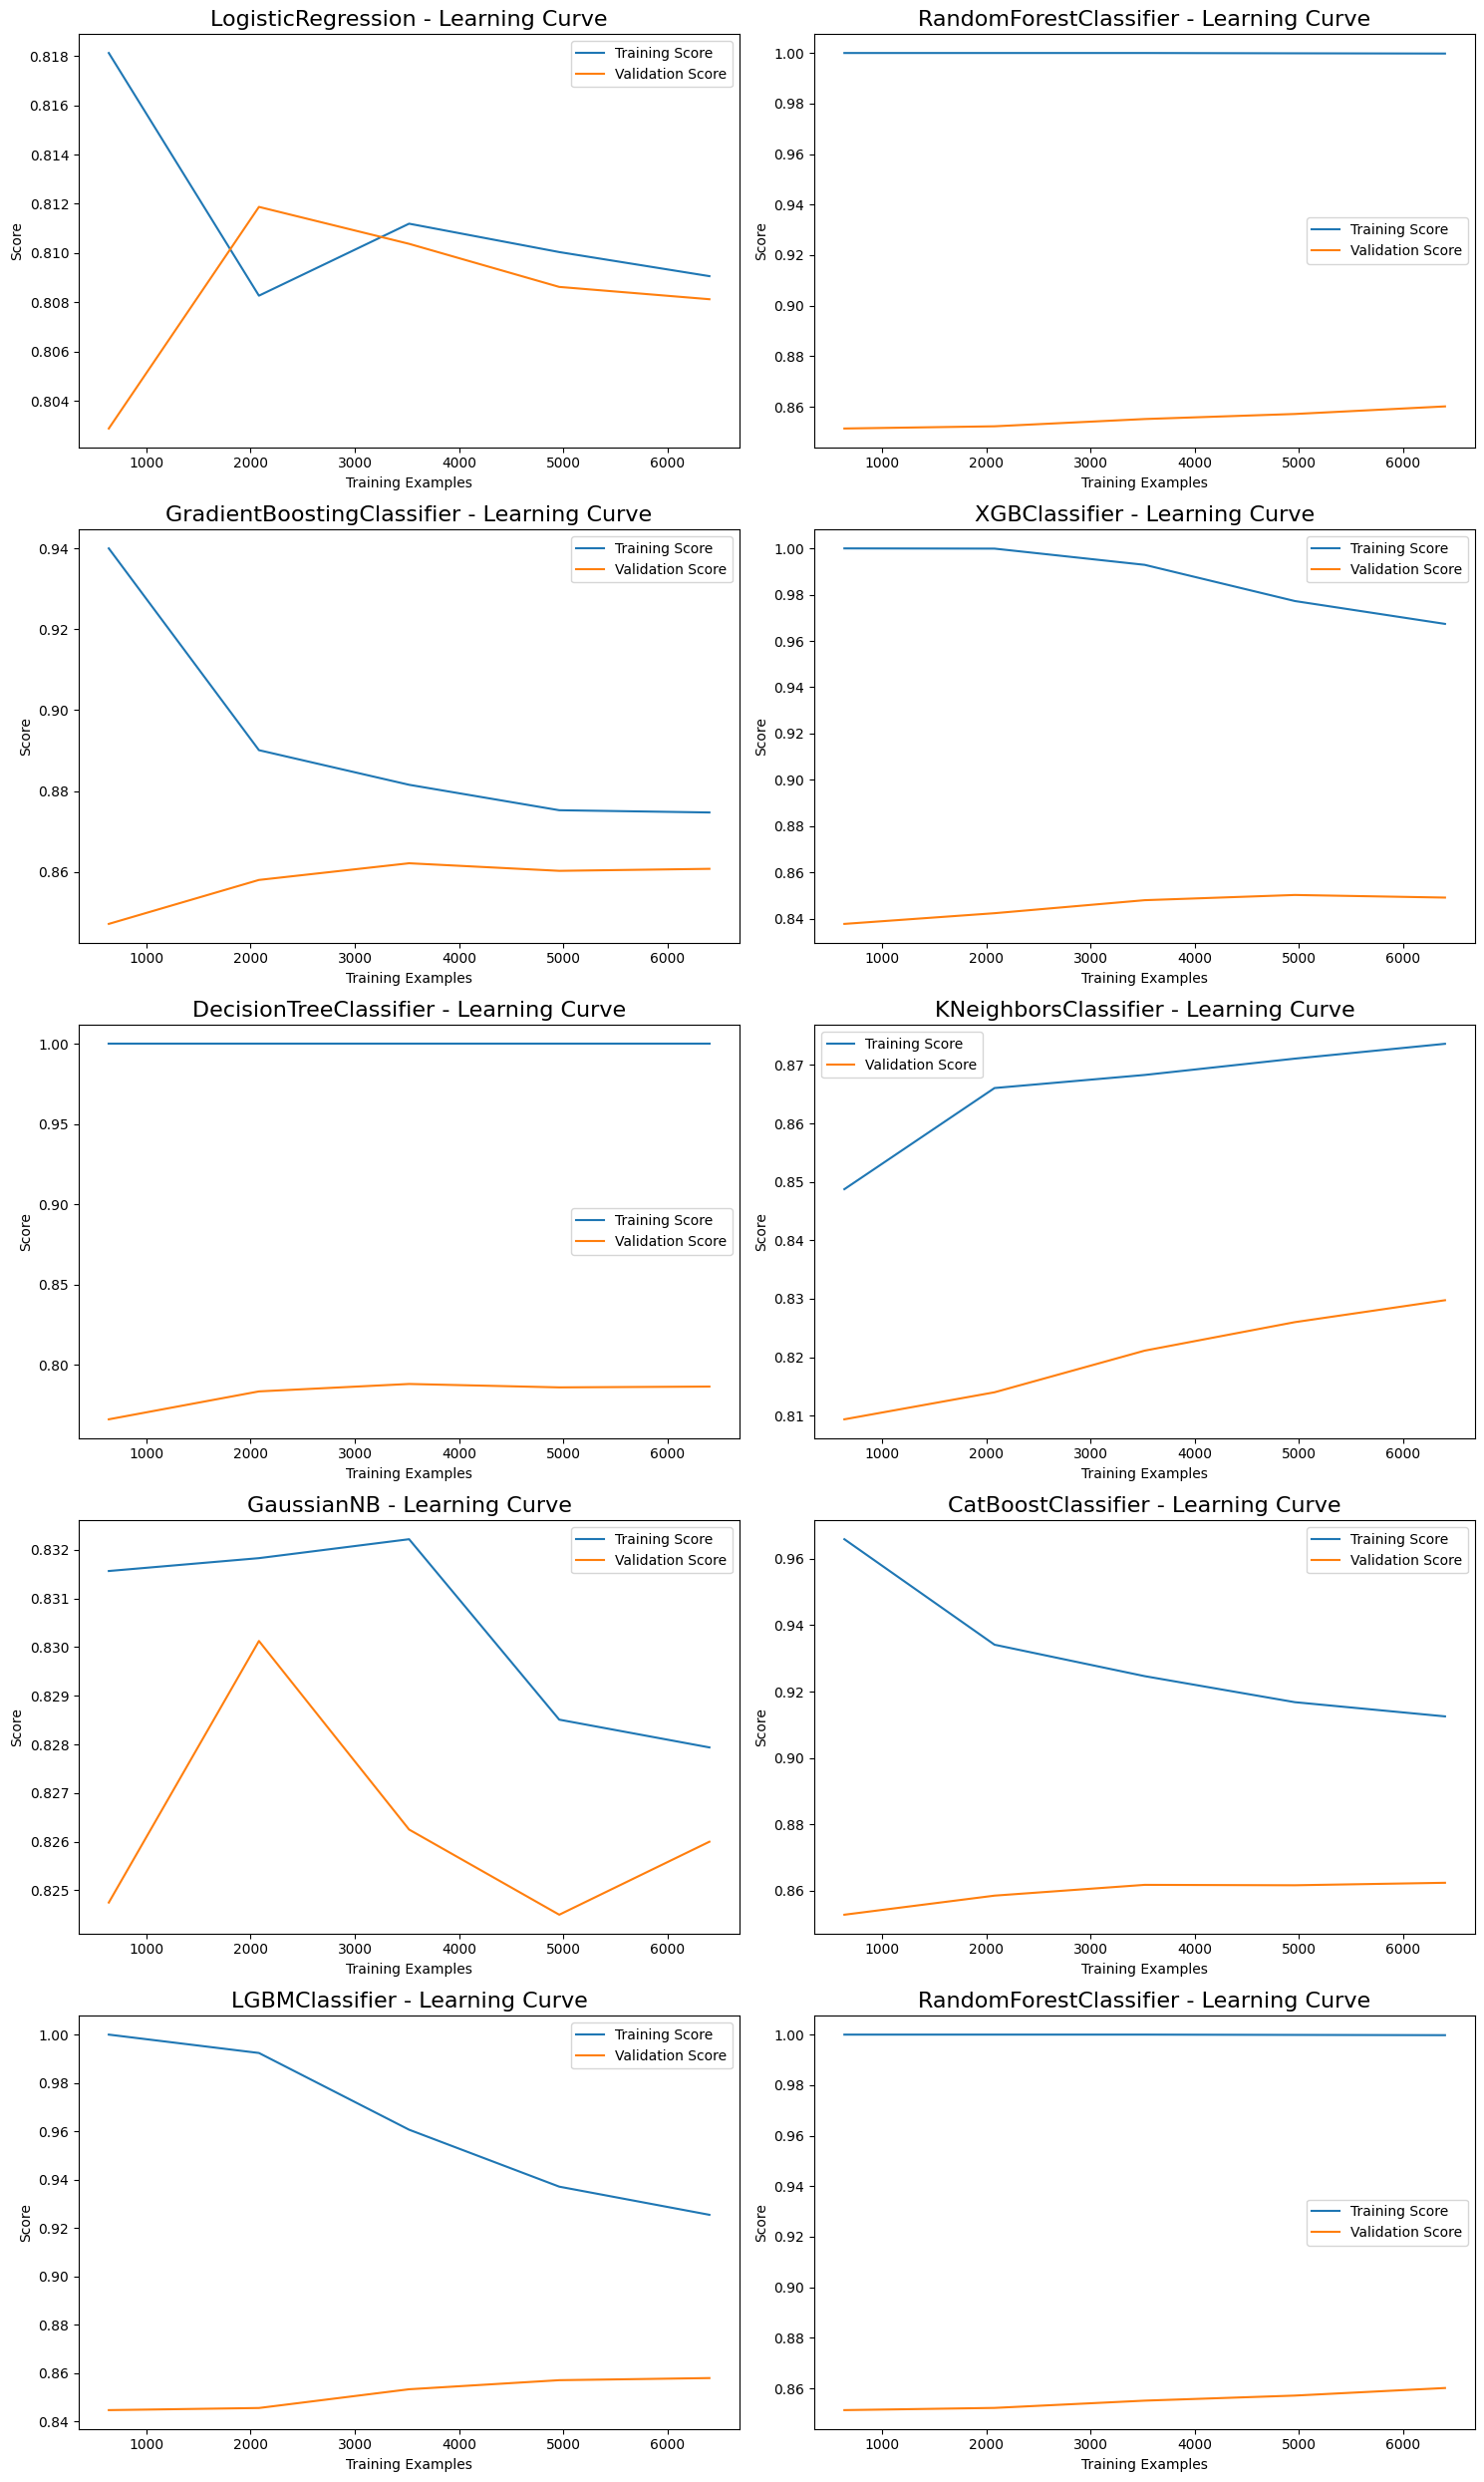

In [83]:
num_models = len(Models)
num_cols = 2
num_rows = (num_models + 1) // 2  # Add 1 to ensure at least 1 row is created

# Create a 2-column grid with the specified number of rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through your models and plot the stored learning curves
for i, model in enumerate(Models):
    model_name = model.__class__.__name__

    # Retrieve learning curve data from total_learning_curves
    learning_curve_data = total_learning_curves.get(model_name)

    if learning_curve_data:
        train_sizes, train_scores, valid_scores = (
            learning_curve_data['train_sizes'],
            learning_curve_data['train_scores'],
            learning_curve_data['valid_scores'],
        )

        # Compute mean scores
        train_scores_mean = np.mean(train_scores, axis=1)
        valid_scores_mean = np.mean(valid_scores, axis=1)

        # Plot learning curves on the i-th subplot
        ax = axes[i]
        ax.plot(train_sizes, train_scores_mean, label='Training Score')
        ax.plot(train_sizes, valid_scores_mean, label='Validation Score')
        ax.set_title(f'{model_name} - Learning Curve', fontsize=16)
        ax.set_xlabel('Training Examples')
        ax.set_ylabel('Score')
        ax.legend()

# Remove any empty subplots
for i in range(num_models, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust subplot layout
plt.tight_layout()
plt.show()


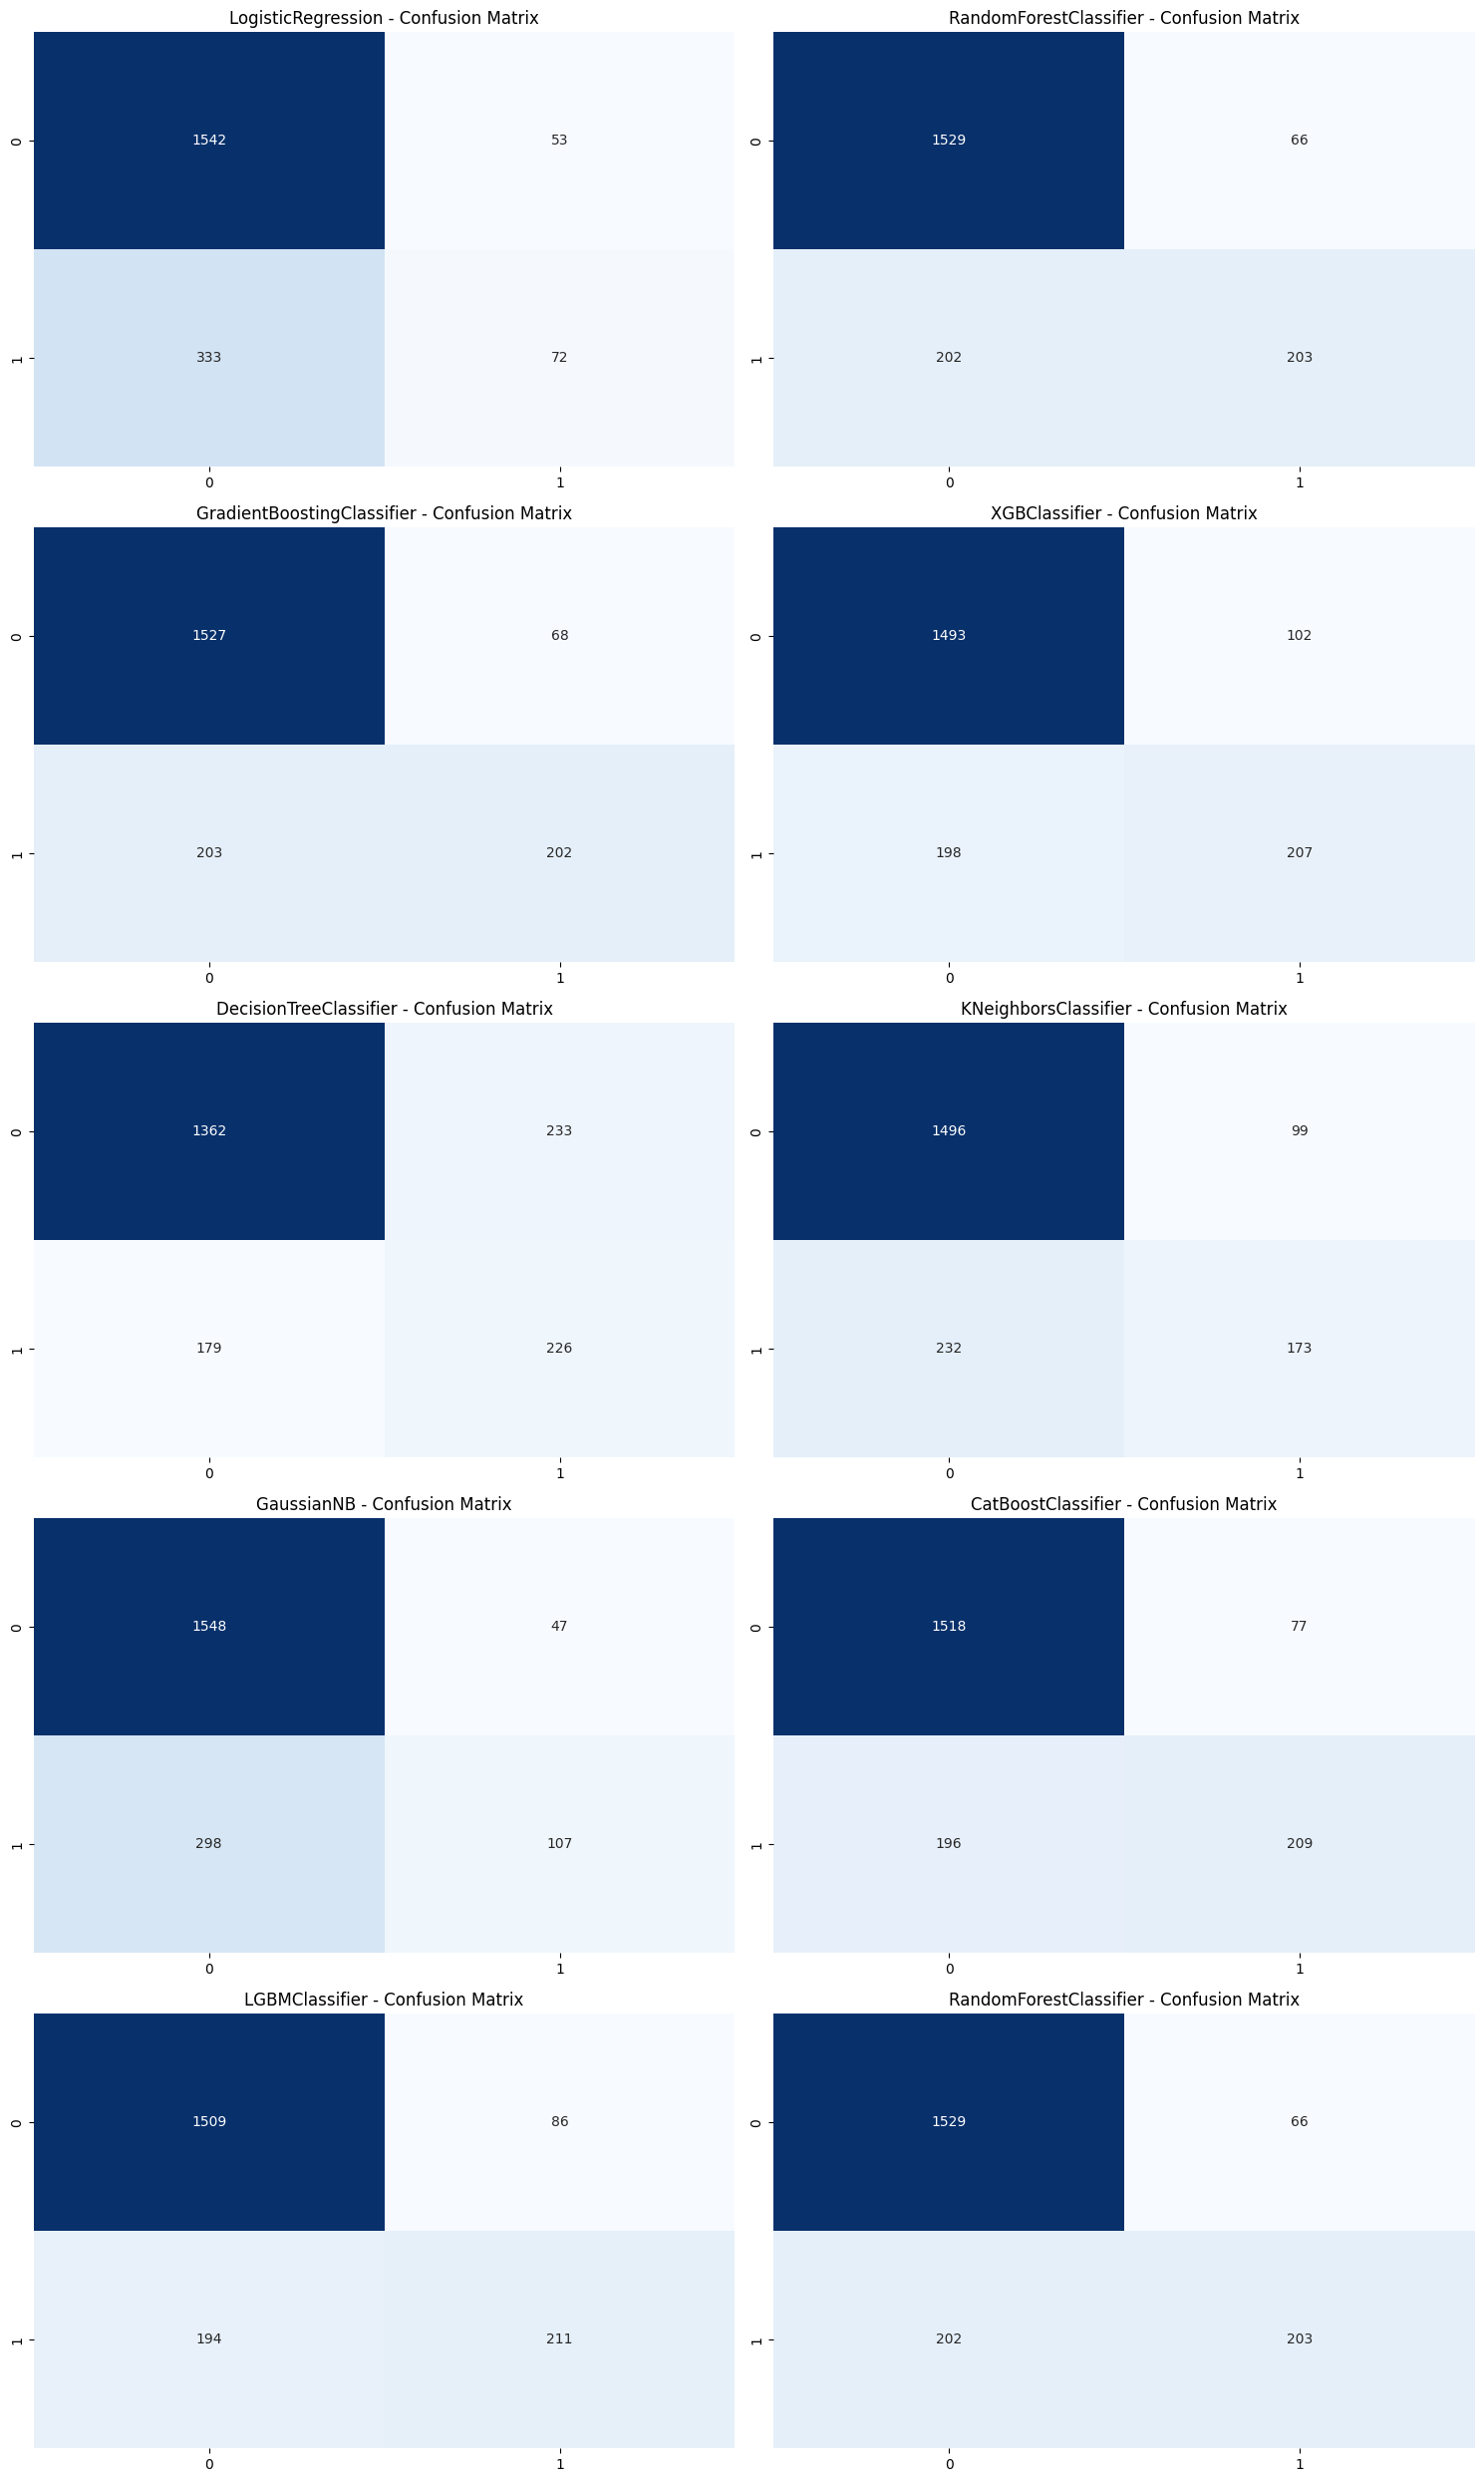

In [80]:
# Determine the number of rows and columns for the grid
num_models = len(Models)
num_cols = 2
num_rows = (num_models + 1) // 2  # Add 1 to ensure at least 1 row is created

# Create a 2-column grid with the specified number of rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through your models and plot confusion matrices
for i, model in enumerate(Models):
    model_name = model.__class__.__name__

    # Retrieve confusion matrix data from total_cm
    confusion_matrix_data = total_cm.get(model_name)

    if confusion_matrix_data is not None:  # Check if confusion_matrix_data is not None
        ax = axes[i]

        # Plot heatmap for confusion matrix
        sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
        ax.set_title(f'{model_name} - Confusion Matrix')

# Remove any empty subplots
for i in range(num_models, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust subplot layout
plt.tight_layout()
plt.show()


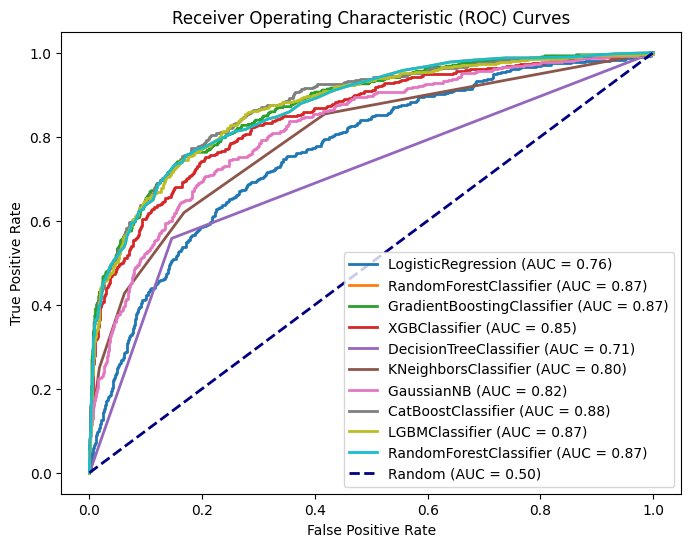

In [81]:
plt.figure(figsize=(8, 6))

# Iterate through your models and plot ROC curves
for model in Models:
    model_name = model.__class__.__name__

    # Retrieve ROC curve data from total_roc_curves
    roc_curve_data = total_roc_curves.get(model_name)

    if roc_curve_data is not None:  # Check if roc_curve_data is not None
        fpr, tpr, thresholds = roc_curve_data['fpr'], roc_curve_data['tpr'], roc_curve_data['thresholds']

        # Calculate AUC (Area Under the Curve)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Draw the diagonal line with ROC = 0.50
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (AUC = 0.50)')

# Set labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

# Show the ROC curve
plt.show()
